
<h1 id="Project-Linear-Regression:-Boston-House-Price-Prediction">Project Linear Regression: Boston House Price Prediction<a class="anchor-link" href="#Project-Linear-Regression:-Boston-House-Price-Prediction">¶</a></h1><h1 id="Marks:-30"><strong>Marks: 30</strong><a class="anchor-link" href="#Marks:-30">¶</a></h1>



<p>Welcome to the project on Linear Regression. We will use the Boston house price data for the exercise.</p>
<hr/>
<h2 id="Problem-Statement">Problem Statement<a class="anchor-link" href="#Problem-Statement">¶</a></h2><hr/>
<p>The problem on hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.</p>
<hr/>
<h2 id="Data-Information">Data Information<a class="anchor-link" href="#Data-Information">¶</a></h2><hr/>
<p>Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-</p>
<p>Attribute Information (in order):</p>
<ul>
<li><strong>CRIM:</strong>     per capita crime rate by town</li>
<li><strong>ZN:</strong>       proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li><strong>INDUS:</strong>    proportion of non-retail business acres per town</li>
<li><strong>CHAS:</strong>     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li><strong>NOX:</strong>      nitric oxides concentration (parts per 10 million)</li>
<li><strong>RM:</strong>       average number of rooms per dwelling</li>
<li><strong>AGE:</strong>     proportion of owner-occupied units built before 1940</li>
<li><strong>DIS:</strong>      weighted distances to five Boston employment centers</li>
<li><strong>RAD:</strong>      index of accessibility to radial highways</li>
<li><strong>TAX:</strong>      full-value property-tax rate per 10,000 dollars</li>
<li><strong>PTRATIO:</strong>  pupil-teacher ratio by town</li>
<li><strong>LSTAT:</strong>    %lower status of the population</li>
<li><strong>MEDV:</strong>     Median value of owner-occupied homes in 1000 dollars</li>
</ul>



<h3 id="Let-us-start-by-importing-the-required-libraries">Let us start by importing the required libraries<a class="anchor-link" href="#Let-us-start-by-importing-the-required-libraries">¶</a></h3>


In [1]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")



<h3 id="Read-the-dataset">Read the dataset<a class="anchor-link" href="#Read-the-dataset">¶</a></h3>


In [2]:
df = pd.read_csv("Boston.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2



<p><strong>Observations</strong></p>
<ul>
<li>The price of the house indicated by the variable MEDV is the target variable and the rest are the independent variables based on which we will predict house price.</li>
</ul>



<h3 id="Get-information-about-the-dataset-using-the-info()-method">Get information about the dataset using the info() method<a class="anchor-link" href="#Get-information-about-the-dataset-using-the-info()-method">¶</a></h3>


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB



<p><strong>Observations</strong></p>
<ul>
<li><p>There are a total of 506 non-null observations in each of the columns. This indicates that there are no missing values in the data.</p>
</li>
<li><p>Every column in this dataset is numeric in nature.</p>
</li>
</ul>



<h3 id="Let's-now-check-the-summary-statistics-of-this-dataset">Let's now check the summary statistics of this dataset<a class="anchor-link" href="#Let's-now-check-the-summary-statistics-of-this-dataset">¶</a></h3>



<h4 id="Question-1:-Write-the-code-to-find-the-summary-statistics-and-write-your-observations-based-on-that.-(1-Mark)"><strong>Question 1:</strong> Write the code to find the summary statistics and write your observations based on that. (1 Mark)<a class="anchor-link" href="#Question-1:-Write-the-code-to-find-the-summary-statistics-and-write-your-observations-based-on-that.-(1-Mark)">¶</a></h4>


In [4]:
#write your code here
df.describe


<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2    


<p><strong>Observations:The variable CHAS has lots of values of zero, this is because it is a binary variable.</strong></p>



<p>Before performing the modeling, it is important to check the univariate distribution of the variables.</p>



<h3 id="Univariate-Analysis">Univariate Analysis<a class="anchor-link" href="#Univariate-Analysis">¶</a></h3>



<h3 id="Check-the-distribution-of-the-variables">Check the distribution of the variables<a class="anchor-link" href="#Check-the-distribution-of-the-variables">¶</a></h3>


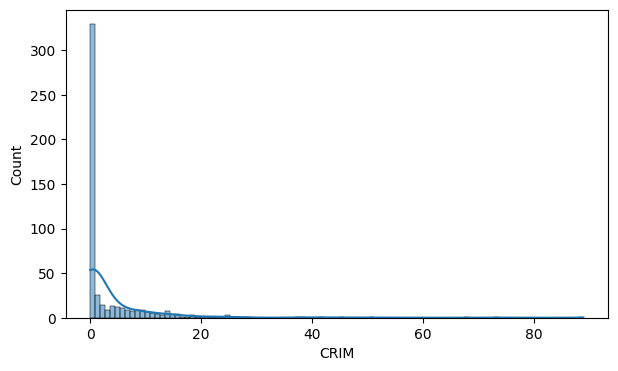

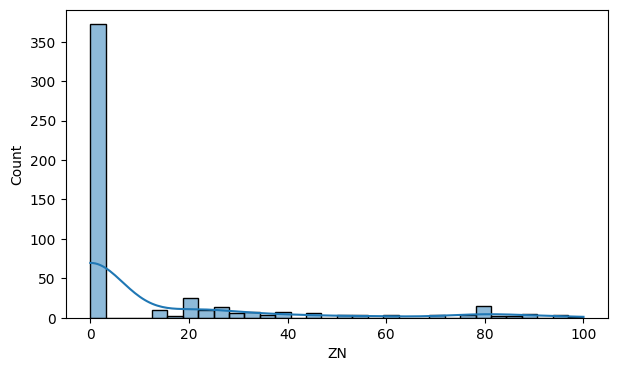

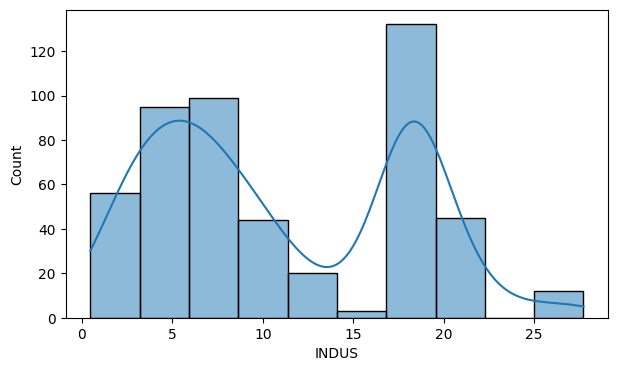

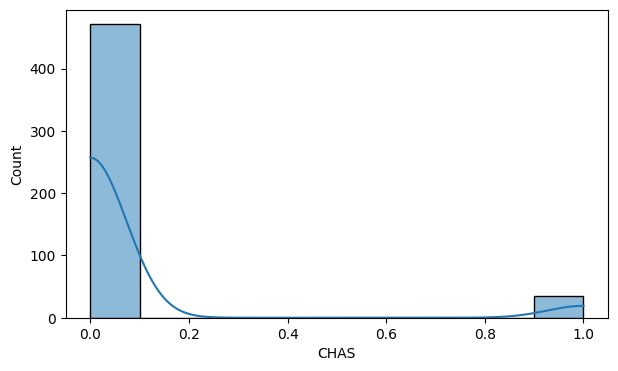

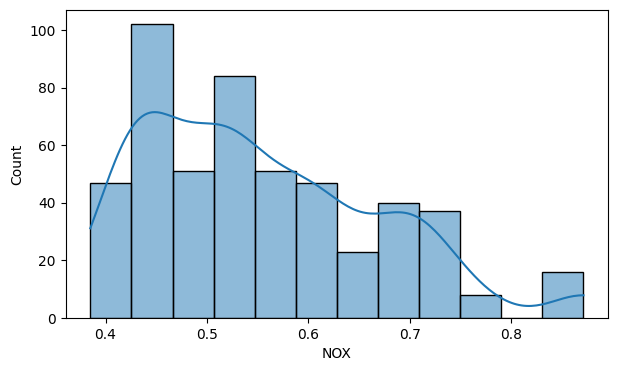

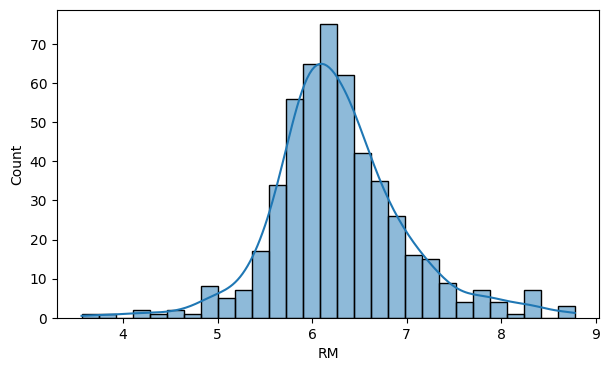

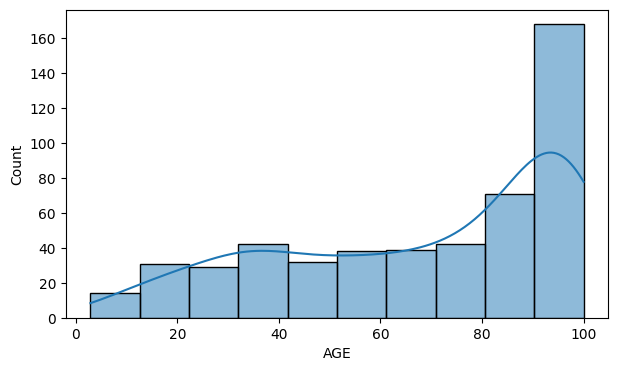

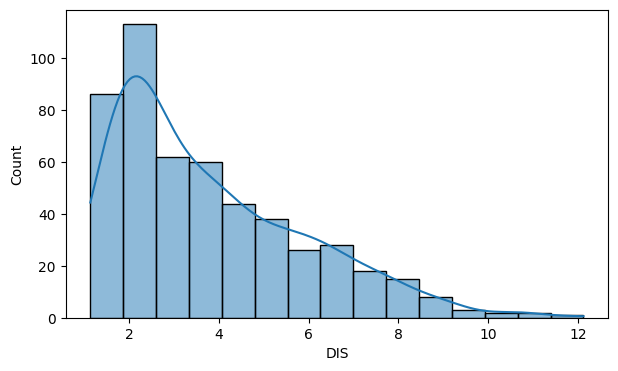

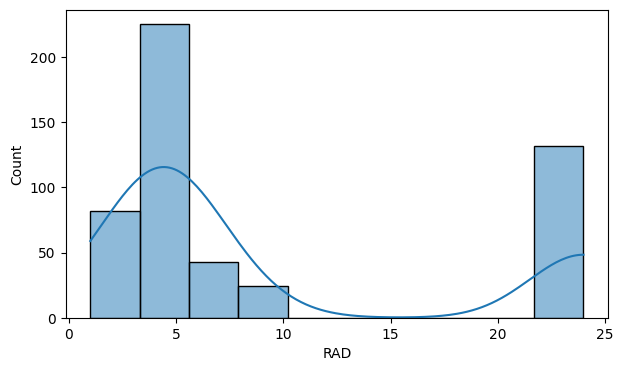

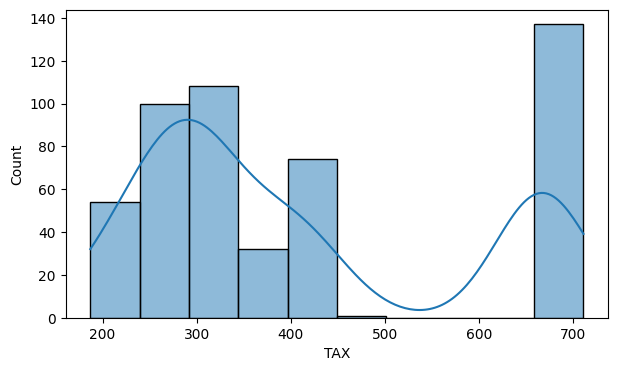

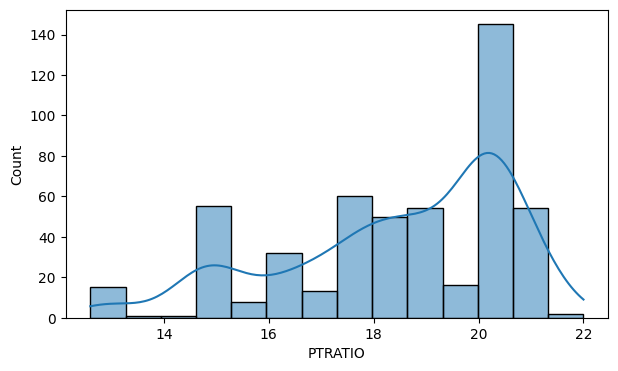

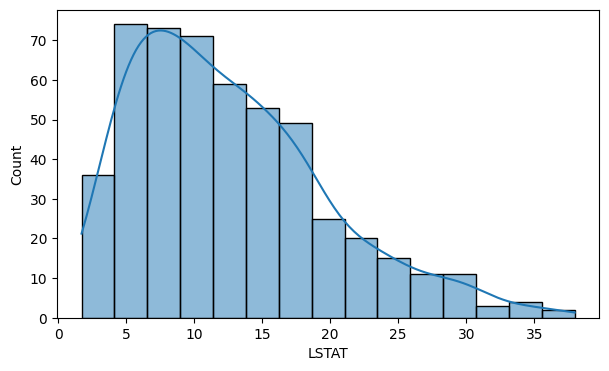

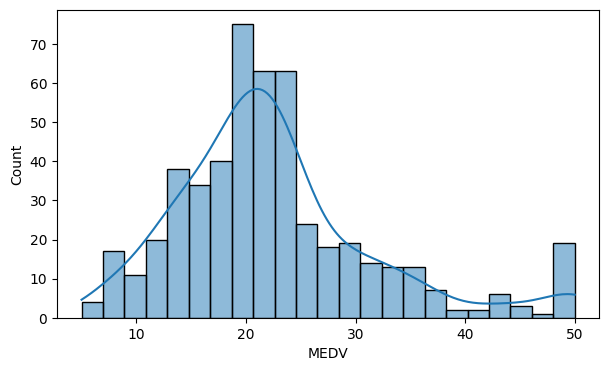

In [5]:
# let's plot all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data=df, x=i, kde = True)
    plt.show()



<p><strong>Observations</strong></p>
<ul>
<li><strong>The variables CRIM and ZN are positively skewed.</strong> This suggests that most of the areas have lower crime rates and most residential plots are under the area of 25,000 sq. ft.</li>
<li><strong>The variable CHAS, with only 2 possible values 0 and 1, follows a binomial distribution</strong>, and the majority of the houses are away from Charles river (CHAS = 0).</li>
<li>The distribution of the variable AGE suggests that many of the owner-occupied houses were built before 1940. </li>
<li><strong>The variable DIS</strong> (average distances to five Boston employment centers) <strong>has a nearly exponential distribution</strong>, which indicates that most of the houses are closer to these employment centers.</li>
<li><strong>The variables TAX and RAD have a bimodal distribution.</strong>, indicating that the tax rate is possibly higher for some properties which have a high index of accessibility to radial highways.  </li>
<li>The dependent variable MEDV seems to be slightly right skewed.</li>
</ul>



<p>As the dependent variable is sightly skewed, we will apply a <strong>log transformation on the 'MEDV' column</strong> and check the distribution of the transformed column.</p>


In [6]:
df['MEDV_log'] = np.log(df['MEDV'])


<Axes: xlabel='MEDV_log', ylabel='Count'>

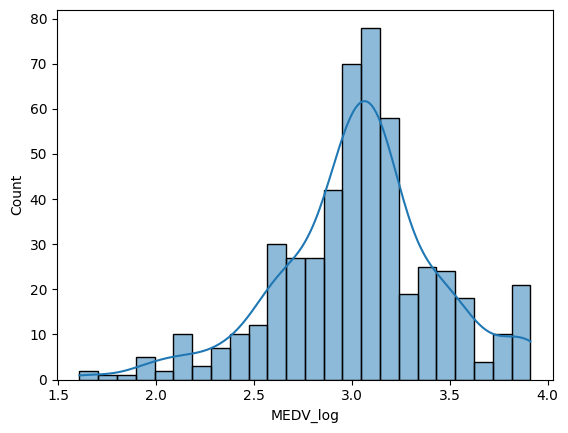

In [7]:
sns.histplot(data=df, x='MEDV_log', kde = True)



<p><strong>Observations</strong></p>
<ul>
<li>The log-transformed variable (<strong>MEDV_log</strong>) appears to have a <strong>nearly normal distribution without skew</strong>, and hence we can proceed.</li>
</ul>



<p>Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.</p>



<h3 id="Bivariate-Analysis">Bivariate Analysis<a class="anchor-link" href="#Bivariate-Analysis">¶</a></h3>



<h4 id="Let's-check-the-correlation-using-the-heatmap">Let's check the correlation using the heatmap<a class="anchor-link" href="#Let's-check-the-correlation-using-the-heatmap">¶</a></h4>



<h3 id="Question-2-(3-Marks):"><strong>Question 2</strong> (3 Marks):<a class="anchor-link" href="#Question-2-(3-Marks):">¶</a></h3><ul>
<li><strong>Write the code to plot the correlation heatmap between the variables (1 Mark)</strong></li>
<li><strong>Write your observations (2 Marks)</strong></li>
</ul>


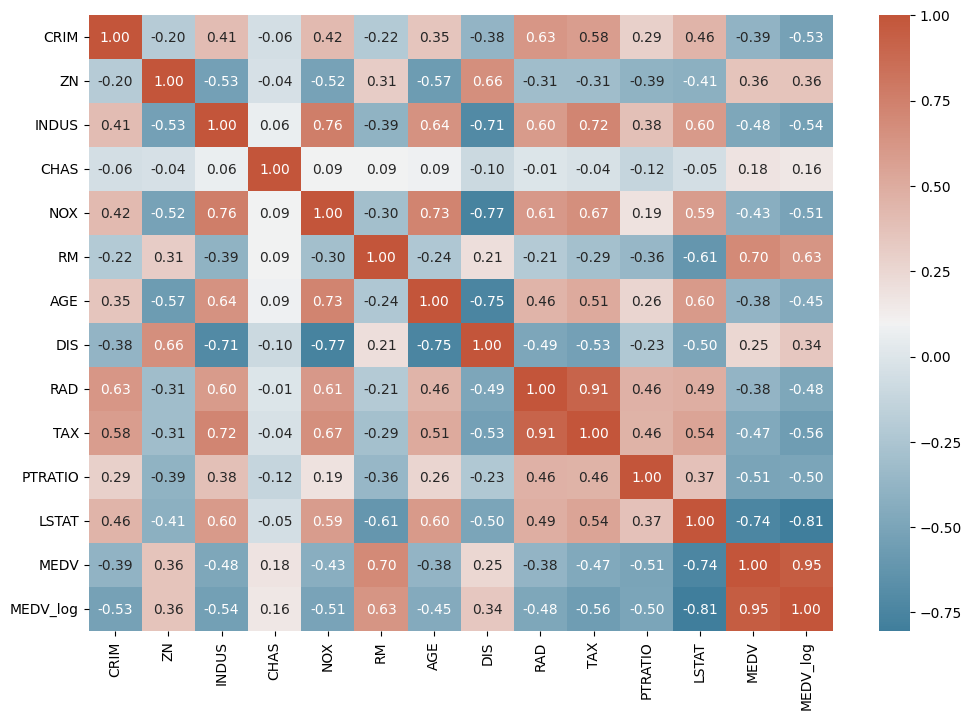

In [8]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), annot = True, fmt='.2f', cmap = cmap ) #write your code here
plt.show()



<p><strong>Observations: Both MEDV and MEDV_LOG have a strong positive correlation with rooms per dwelling. Variable LSTAT has a strong negative correlation with MEDV and MEDV_LOG. There INDUS variable has a strong positive correlation with the variable TAX. Variable CRIM has fairly negative correlation against MEDV. AGE, NDKm, and INDUS variables all have a negative correlation with distance.</strong></p>



<p>Now, we will visualize the relationship between the pairs of features having significant correlations.</p>



<h3 id="Visualizing-the-relationship-between-the-features-having-significant-correlations-(%3E-0.7)">Visualizing the relationship between the features having significant correlations (&gt; 0.7)<a class="anchor-link" href="#Visualizing-the-relationship-between-the-features-having-significant-correlations-(%3E-0.7)">¶</a></h3>



<h3 id="Question-3-(6-Marks):"><strong>Question 3</strong> (6 Marks):<a class="anchor-link" href="#Question-3-(6-Marks):">¶</a></h3><ul>
<li><strong>Create a scatter plot to visualize the relationship between the features having significant correlations (&gt;0.7) (3 Marks)</strong></li>
<li><strong>Write your observations from the plots (3 Marks)</strong></li>
</ul>


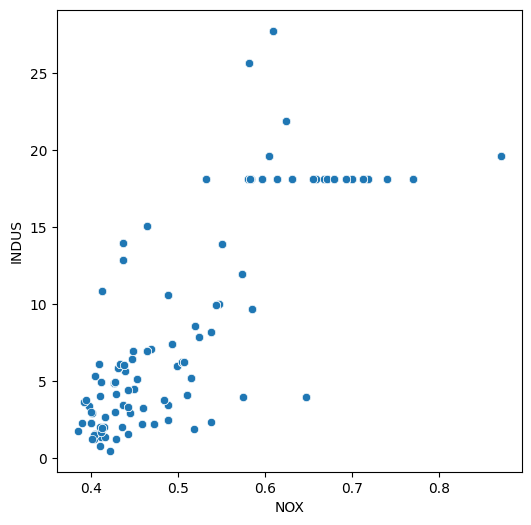

In [9]:
# scatterplot to visualize the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = df['NOX'], y = df['INDUS'], data = df) #write you code here
plt.show()



<p><strong>Observations: The majority of the homes with a high median value tend to have a low nitric oxide content and a smaller proportion of non retail business acres in the town. The nitric oxide level increases as the proportion of non business retail acres increases.</strong></p>


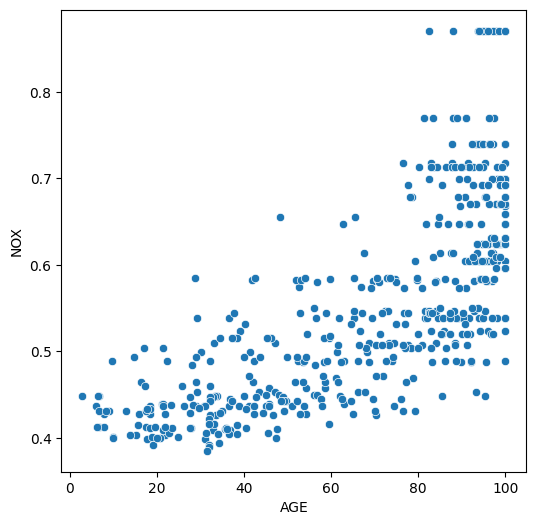

In [10]:
# scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = df['AGE'], y = df['NOX']) #Write your code here
plt.show()



<p><strong>Observations: Nitric oxide levels increase as the age of the house increases.</strong></p>


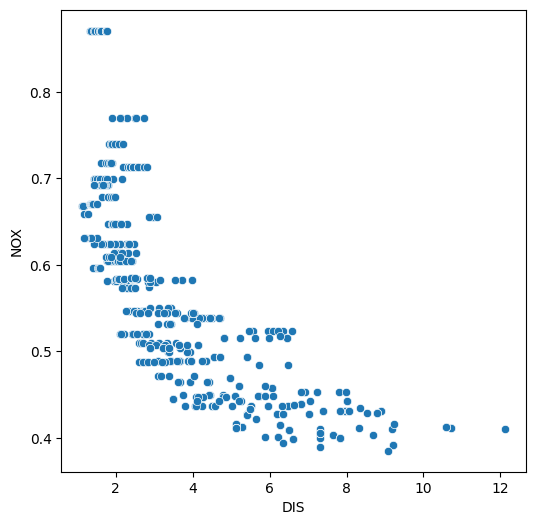

In [11]:
# scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = df['DIS'], y = df['NOX']) #Write your code here
plt.show()



<p><strong>Observations:There is a negative quadrativ relation between the variables DIS and NOX. Homes with a higher median value tend to have lower levels of nitric oxide and a higher weighted distance relative to employment centers in the area. Nitric oxide levels tend to decrease as weighted distance increases.</strong></p>


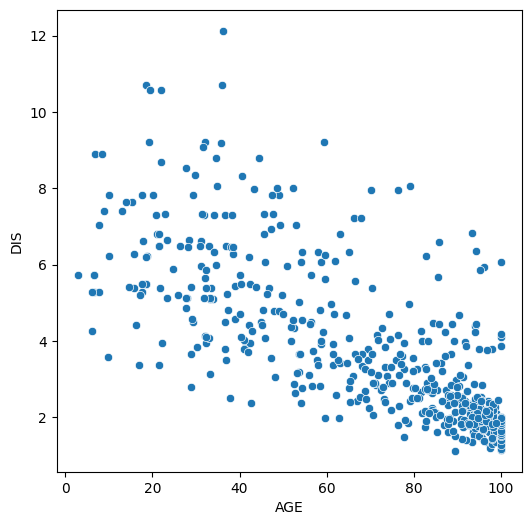

In [12]:
# scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = df)
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.</li>
</ul>


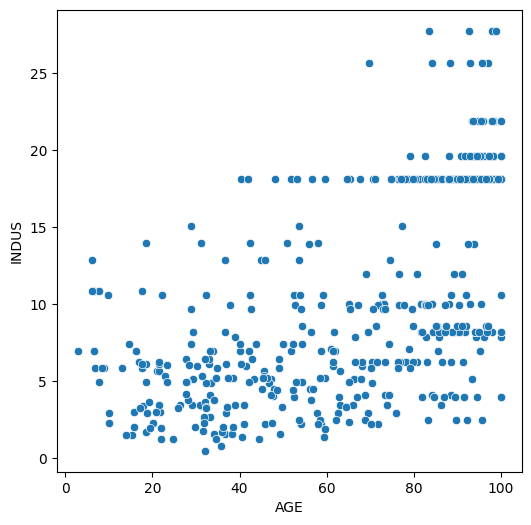

In [13]:
# scatterplot to visualize the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = df)
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>No trend between the two variables is visible in the above plot.</li>
</ul>


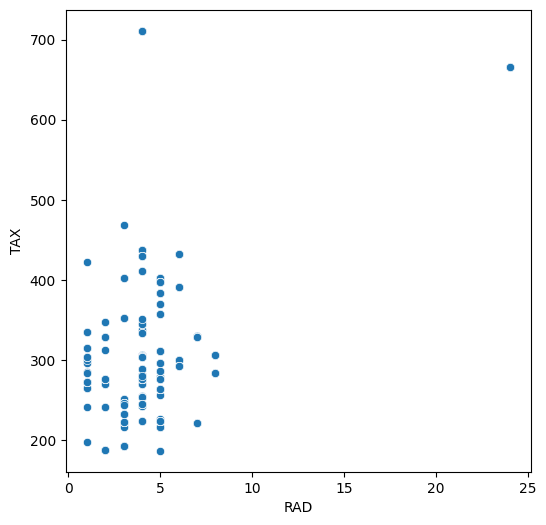

In [14]:
# scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = df)
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>The correlation between RAD and TAX is very high. But, no trend is visible between the two variables. 
This might be due to outliers. </li>
</ul>



<p>Let's check the correlation after removing the outliers.</p>


In [15]:
# remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])


The correlation between TAX and RAD is 0.24975731331429196



<p>So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.</p>


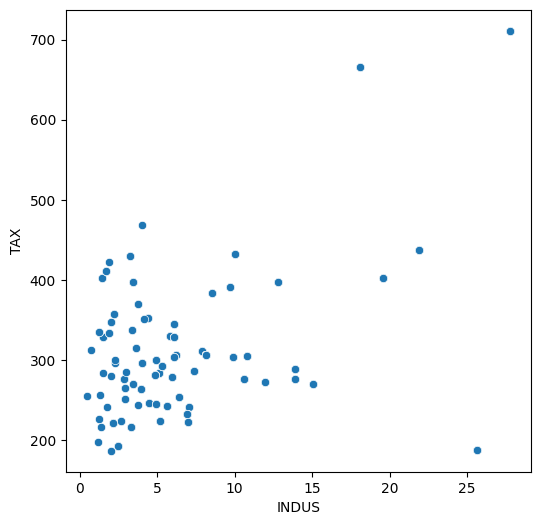

In [16]:
# scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.</li>
</ul>


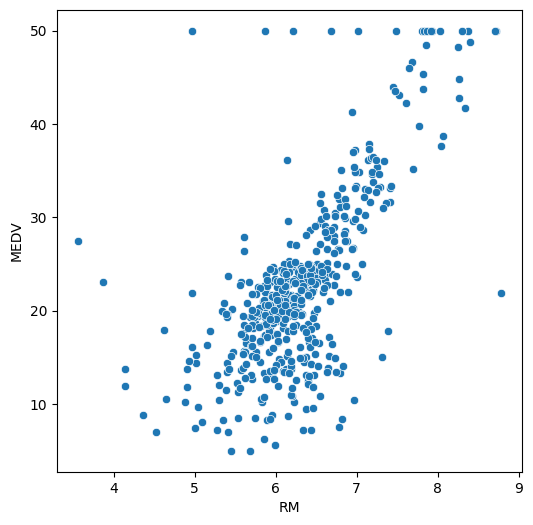

In [17]:
# scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = df)
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li><p>The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.</p>
</li>
<li><p>There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.</p>
</li>
</ul>


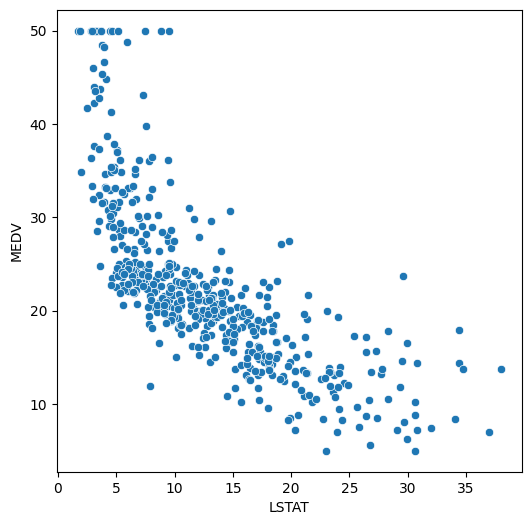

In [18]:
# scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()



<p><strong>Observations:</strong></p>
<ul>
<li>The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.</li>
<li>There are few outliers and the data seems to be capped at 50.</li>
</ul>



<p>We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among a few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.</p>



<h3 id="Split-the-dataset">Split the dataset<a class="anchor-link" href="#Split-the-dataset">¶</a></h3><p>Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.</p>


In [19]:
# separate the dependent and independent variable
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log'})

# add the intercept term
X = sm.add_constant(X)


In [20]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)



<p>Next, we will check the multicollinearity in the train dataset.</p>



<h3 id="Check-for-Multicollinearity">Check for Multicollinearity<a class="anchor-link" href="#Check-for-Multicollinearity">¶</a></h3><p>We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.</p>
<p>Features having a VIF score &gt; 5 will be dropped/treated till all the features have a VIF score &lt; 5</p>


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))


    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881



<p><strong>Observations:</strong></p>
<ul>
<li>There are two variables with a high VIF - RAD and TAX. Let's remove TAX as it has the highest VIF values and check the multicollinearity again.</li>
</ul>



<h4 id="Question-4:-Drop-the-column-'TAX'-from-the-training-data-and-check-if-multicollinearity-is-removed?-(1-Mark)"><strong>Question 4:</strong> Drop the column 'TAX' from the training data and check if multicollinearity is removed? (1 Mark)<a class="anchor-link" href="#Question-4:-Drop-the-column-'TAX'-from-the-training-data-and-check-if-multicollinearity-is-removed?-(1-Mark)">¶</a></h4>


In [22]:
# create the model after dropping TAX
X_train = X_train.drop(['TAX'], axis=1)
#write your code here

# check for VIF
print(checking_vif(X_train))


    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251



<p>Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.</p>



<h4 id="Question-5:-Write-the-code-to-create-the-linear-regression-model-and-print-the-model-summary.-Write-your-observations-from-the-model.-(3-Marks)"><strong>Question 5:</strong> Write the code to create the linear regression model and print the model summary. Write your observations from the model. (3 Marks)<a class="anchor-link" href="#Question-5:-Write-the-code-to-create-the-linear-regression-model-and-print-the-model-summary.-Write-your-observations-from-the-model.-(3-Marks)">¶</a></h4>


In [23]:
model = sm.OLS(y_train, X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          1.40e-101
Time:                        11:10:48   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


<p><strong>Observations:This model can explain about 76.9% of the data according to the r-squared value</strong></p>



<h4 id="Question-6:-Drop-insignificant-variables-from-the-above-model-and-create-the-regression-model-again.-(2-Marks)"><strong>Question 6:</strong> Drop insignificant variables from the above model and create the regression model again. (2 Marks)<a class="anchor-link" href="#Question-6:-Drop-insignificant-variables-from-the-above-model-and-create-the-regression-model-again.-(2-Marks)">¶</a></h4>



<h3 id="Examining-the-significance-of-the-model">Examining the significance of the model<a class="anchor-link" href="#Examining-the-significance-of-the-model">¶</a></h3><p>It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero.</p>
<p>From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.</p>


In [24]:
# create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df dataframe
Y = df['MEDV_log']
X = df.drop(columns = {'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS'}) #write your code here
X = sm.add_constant(X)

#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

# create the model
model2 = sm.OLS(y_train, X_train).fit() #write your code here
# get the model summary
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          2.61e-104
Time:                        11:10:48   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


<p><strong>Observations:</strong></p>
<ul>
<li>We can see that the <strong>R-squared value has decreased by 0.002</strong>, since we have removed variables from the model, whereas the <strong>adjusted R-squared value has increased by 0.001</strong>, since we removed statistically insignificant variables only.</li>
</ul>



<p>Now, we will check the linear regression assumptions.</p>



<h3 id="Check-the-below-linear-regression-assumptions">Check the below linear regression assumptions<a class="anchor-link" href="#Check-the-below-linear-regression-assumptions">¶</a></h3><ol>
<li><strong>Mean of residuals should be 0</strong></li>
<li><strong>No Heteroscedasticity</strong></li>
<li><strong>Linearity of variables</strong></li>
<li><strong>Normality of error terms</strong></li>
</ol>



<h4 id="Question-7:-Write-the-code-to-check-the-above-linear-regression-assumptions-and-provide-insights.-(4-Marks)"><strong>Question 7:</strong> Write the code to check the above linear regression assumptions and provide insights. (4 Marks)<a class="anchor-link" href="#Question-7:-Write-the-code-to-check-the-above-linear-regression-assumptions-and-provide-insights.-(4-Marks)">¶</a></h4>



<h4 id="Check-for-mean-residuals">Check for mean residuals<a class="anchor-link" href="#Check-for-mean-residuals">¶</a></h4>


In [25]:
# Write your code here
residual = model2.resid
residual.mean()


-3.073498768736309e-16


<p><strong>Observations:The mean of the residuals is close to zerom, meaning the corresponding assumption is satisfied.</strong></p>



<h4 id="Check-for-homoscedasticity">Check for homoscedasticity<a class="anchor-link" href="#Check-for-homoscedasticity">¶</a></h4>



<ul>
<li><p>Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to homoscedastic.</p>
</li>
<li><p>Heteroscedasticity - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.</p>
</li>
<li><p>We'll use <code>Goldfeldquandt Test</code> to test the following hypothesis with alpha = 0.05:</p>
<ul>
<li>Null hypothesis: Residuals are homoscedastic</li>
<li>Alternate hypothesis: Residuals have heteroscedastic</li>
</ul>
</li>
</ul>


In [26]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms


In [27]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)


[('F statistic', 1.0835082923425288), ('p-value', 0.30190120067668963)]


<p><strong>Observations: The p-value is greater than 0.05, so we fail to reject the null-hypothesis. Therefore the residuals are homoscedastic</strong></p>



<h4 id="Linearity-of-variables">Linearity of variables<a class="anchor-link" href="#Linearity-of-variables">¶</a></h4><p>It states that the predictor variables must have a linear relation with the dependent variable.</p>
<p>To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.</p>


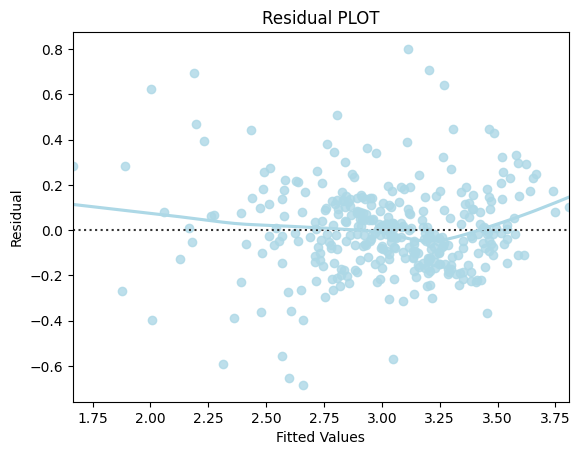

In [28]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residual, color="lightblue", lowess=True) #write your code here
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()



<p><strong>Observations:The residuals seem to be randomly distributed and not following any specific pattern.</strong></p>



<h4 id="Normality-of-error-terms">Normality of error terms<a class="anchor-link" href="#Normality-of-error-terms">¶</a></h4><p>The residuals should be normally distributed.</p>


<Axes: ylabel='Count'>

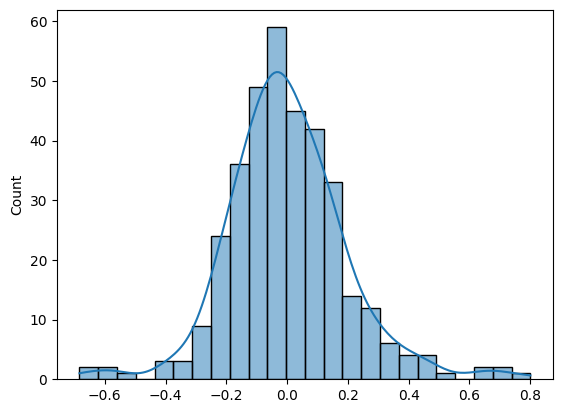

In [29]:
# Plot histogram of residuals
#write your code here
sns.histplot(residual, kde = True)


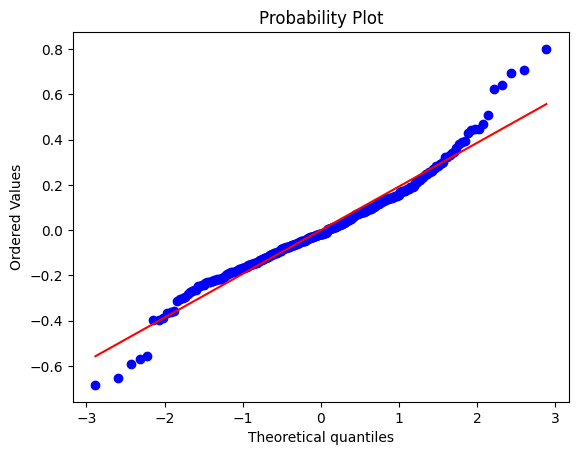

In [30]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residual, dist="norm", plot=pylab)
plt.show()



<p><strong>Observations:The residuals are normally distributed</strong></p>



<h3 id="Check-the-performance-of-the-model-on-the-train-and-test-data-set">Check the performance of the model on the train and test data set<a class="anchor-link" href="#Check-the-performance-of-the-model-on-the-train-and-test-data-set">¶</a></h3>



<h4 id="Question-8:-Write-your-observations-by-comparing-model-performance-of-train-and-test-dataset-(2-Marks)"><strong>Question 8:</strong> Write your observations by comparing model performance of train and test dataset (2 Marks)<a class="anchor-link" href="#Question-8:-Write-your-observations-by-comparing-model-performance-of-train-and-test-dataset-(2-Marks)">¶</a></h4>


In [31]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)  


    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965



<p><strong>Observations: The model performs very closely on the testing data as it did on training data. </strong></p>



<h4 id="Apply-cross-validation-to-improve-the-model-and-evaluate-it-using-different-evaluation-metrics">Apply cross validation to improve the model and evaluate it using different evaluation metrics<a class="anchor-link" href="#Apply-cross-validation-to-improve-the-model-and-evaluate-it-using-different-evaluation-metrics">¶</a></h4>



<h4 id="Question-9:-Apply-the-cross-validation-technique-to-improve-the-model-and-evaluate-it-using-different-evaluation-metrics.-(1-Mark)"><strong>Question 9:</strong> Apply the cross validation technique to improve the model and evaluate it using different evaluation metrics. (1 Mark)<a class="anchor-link" href="#Question-9:-Apply-the-cross-validation-technique-to-improve-the-model-and-evaluate-it-using-different-evaluation-metrics.-(1-Mark)">¶</a></h4>


In [32]:
# import the required function

from sklearn.model_selection import cross_val_score

# build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, scoring = 'neg_mean_squared_error')                           


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))


RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)



<p><strong>Observations</strong></p>
<ul>
<li>The R-squared on the cross validation is 0.729, whereas on the training dataset it was 0.769</li>
<li>And the MSE on cross validation is 0.041, whereas on the training dataset it was 0.038</li>
</ul>



<p>We may want to reiterate the model building process again with new features or better feature engineering to increase the R-squared and decrease the MSE on cross validation.</p>



<h4 id="Question-10:-Get-model-Coefficients-in-a-pandas-dataframe-with-column-'Feature'-having-all-the-features-and-column-'Coefs'-with-all-the-corresponding-Coefs.-Write-the-regression-equation.-(2-Marks)"><strong>Question 10:</strong> Get model Coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs. Write the regression equation. (2 Marks)<a class="anchor-link" href="#Question-10:-Get-model-Coefficients-in-a-pandas-dataframe-with-column-'Feature'-having-all-the-features-and-column-'Coefs'-with-all-the-corresponding-Coefs.-Write-the-regression-equation.-(2-Marks)">¶</a></h4>


In [33]:
coef = model2.params
print(coef)


const      4.649386
CRIM      -0.012500
CHAS       0.119773
NOX       -1.056225
RM         0.058907
DIS       -0.044069
RAD        0.007848
PTRATIO   -0.048504
LSTAT     -0.029277
dtype: float64


In [34]:
# Let us write the equation of the fit
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')


log (Price) =	( 4.6493858232666305 ) *  const + ( -0.012500455079103662 ) *  CRIM + ( 0.11977319077019889 ) *  CHAS + ( -1.0562253516683264 ) *  NOX + ( 0.058906575109279734 ) *  RM + ( -0.04406889079940493 ) *  DIS + ( 0.007848474606243515 ) *  RAD + ( -0.048503620794998675 ) *  PTRATIO + ( -0.029277040479796693 ) *  LSTAT + 


<h4 id="Question-11:-Write-the-conclusions-and-business-recommendations-derived-from-the-model.-(5-Marks)"><strong>Question 11:</strong> Write the conclusions and business recommendations derived from the model. (5 Marks)<a class="anchor-link" href="#Question-11:-Write-the-conclusions-and-business-recommendations-derived-from-the-model.-(5-Marks)">¶</a></h4>



<p>Write Conclusions 
Variables CHAS, RAD, and RM are the only variables with positive coefficients.</p>



<p>Write Recommendations here
When predicting a the price of a house in the boston suburbs, it is important to note the crime rate, wether or not the home has a tract that bounds the Charles river, Nitrous oxide levels, the rooms in the dwelling, the distance from employment centers, and other variables such as RAD, PTRATIO, and LSTAT.</p>
